In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from geopy.distance import great_circle

In [97]:
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')
df.to_csv('hiscov_dataset.csv', index=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_44464\1640984538.py:1: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


In [3]:
Eng_df = df[df['country_name'] == 'England']
Eng_df.dropna(subset=['city_latitude'], inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_44464\1281430518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eng_df.dropna(subset=['city_latitude'], inplace=True)


In [7]:
Eng_df['admin_level_2'].count()

3290

In [8]:
Eng_df.shape

(3322, 85)

In [12]:
print(Eng_df['admin_level_2'].value_counts())

admin_level_2
Wiltshire          158
Manchester         128
Liverpool          118
North Norfolk       78
Cornwall            70
                  ... 
Enfield              1
Epsom and Ewell      1
Ealing               1
Middlesbrough        1
Merton               1
Name: count, Length: 264, dtype: int64


In [18]:
Eng_grouped = Eng_df.groupby('admin_level_2').agg({
    'city_latitude': 'mean',
    'city_longitude': 'mean',
    'admin_level_2': 'count'
}).rename(columns={'admin_level_2': 'count'})

In [20]:
Eng_top_50 = Eng_grouped.sort_values(by='count', ascending=False).head(50)

In [31]:
Eng_top_50.to_csv('Eng_top50.csv', index=True)

In [36]:
Eng_top50 = pd.read_csv('D:\code\HiSCoD\Eng_top50.csv', sep=',')
Eng_top50.insert(0,'index', range(len(Eng_top50)), allow_duplicates=False)

In [54]:
Eng_top50

,index,admin_level_2,city_latitude,city_longitude,count
0,0,Wiltshire,51.282540,-1.913349,158
1,1,Manchester,53.481109,-2.244888,128
2,2,Liverpool,53.404798,-2.981275,118
3,3,North Norfolk,52.848661,1.233767,78
4,4,Cornwall,50.301889,-4.961383,70
5,5,Dorset,50.810675,-2.338103,65
6,6,West Berkshire,51.424057,-1.300919,61
7,7,Broadland,52.733597,1.247059,57
8,8,South Norfolk,52.522904,1.254739,55
9,9,Dover,51.210671,1.289321,55


In [40]:
def calculate_distance(coord1, coord2):
    return great_circle(coord1, coord2).kilometers

In [55]:
distance_threshold = 50

G_eng = nx.Graph()

for idx, row in Eng_top50.iterrows():
    G_eng.add_node(row['index'], city=row['admin_level_2'], pos=(row['city_latitude'], row['city_longitude']), wight = row['count'])

In [60]:
for i, row1 in Eng_top50.iterrows():
    for j, row2 in Eng_top50.iterrows():
        if i < j:  
            coord1 = (row1['city_latitude'], row1['city_longitude'])
            coord2 = (row2['city_latitude'], row2['city_longitude'])
            distance = calculate_distance(coord1, coord2)
            if distance <= distance_threshold:
                G_eng.add_edge(row1['index'], row2['index'], weight= np.around(distance, 2))

In [61]:
print(G_eng.nodes(data=True))

[(0, {'city': 'Wiltshire', 'pos': (51.2825398192912, -1.9133494223760612), 'wight': 158}), (1, {'city': 'Manchester', 'pos': (53.4811087803479, -2.24488849333542), 'wight': 128}), (2, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139), 'wight': 118}), (3, {'city': 'North Norfolk', 'pos': (52.84866056818161, 1.2337673855088958), 'wight': 78}), (4, {'city': 'Cornwall', 'pos': (50.30188871677944, -4.961382632819727), 'wight': 70}), (5, {'city': 'Dorset', 'pos': (50.810674844500895, -2.338102506052036), 'wight': 65}), (6, {'city': 'West Berkshire', 'pos': (51.42405690827452, -1.3009190465378246), 'wight': 61}), (7, {'city': 'Broadland', 'pos': (52.73359678880514, 1.2470586246583033), 'wight': 57}), (8, {'city': 'South Norfolk', 'pos': (52.52290425181951, 1.254738610722362), 'wight': 55}), (9, {'city': 'Dover', 'pos': (51.21067092027838, 1.2893209708269473), 'wight': 55}), (10, {'city': 'Shropshire', 'pos': (52.787856834418925, -2.656034731353126), 'wight': 53}), (11, {'city

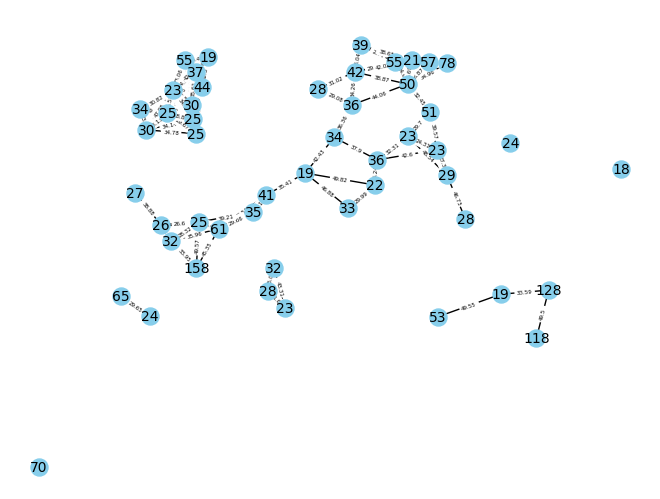

In [77]:
# 绘制图
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G_eng.nodes(data=True)}
wight = {node: data['wight'] for node, data in G_eng.nodes(data=True)}
nx.draw(G_eng, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=10, labels = wight)

# 添加标签
labels = nx.get_edge_attributes(G_eng, 'weight')
nx.draw_networkx_edge_labels(G_eng, pos, edge_labels=labels,font_size=4)

plt.show()

In [72]:
# 度中心性
degree_centrality = nx.degree_centrality(G_eng)
print("Degree Centrality:", degree_centrality)

# 社区检测
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G_eng)
print("Communities:", communities)

# 路径分析
shortest_paths = dict(nx.all_pairs_shortest_path(G_eng))
print("Shortest Paths:", shortest_paths)

Degree Centrality: {0: 0.061224489795918366, 1: 0.04081632653061224, 2: 0.02040816326530612, 3: 0.08163265306122448, 4: 0.0, 5: 0.02040816326530612, 6: 0.12244897959183673, 7: 0.08163265306122448, 8: 0.12244897959183673, 9: 0.1020408163265306, 10: 0.02040816326530612, 11: 0.061224489795918366, 12: 0.14285714285714285, 13: 0.18367346938775508, 14: 0.12244897959183673, 15: 0.061224489795918366, 16: 0.061224489795918366, 17: 0.12244897959183673, 18: 0.08163265306122448, 19: 0.08163265306122448, 20: 0.061224489795918366, 21: 0.14285714285714285, 22: 0.061224489795918366, 23: 0.04081632653061224, 24: 0.04081632653061224, 25: 0.08163265306122448, 26: 0.12244897959183673, 27: 0.18367346938775508, 28: 0.061224489795918366, 29: 0.02040816326530612, 30: 0.04081632653061224, 31: 0.04081632653061224, 32: 0.02040816326530612, 33: 0.08163265306122448, 34: 0.14285714285714285, 35: 0.14285714285714285, 36: 0.1020408163265306, 37: 0.16326530612244897, 38: 0.02040816326530612, 39: 0.0, 40: 0.20408163265

In [78]:
Fr_df = df[df['country_name'] == 'France']
Fr_df.dropna(subset=['city_latitude'], inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_44464\2229038633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fr_df.dropna(subset=['city_latitude'], inplace=True)


In [79]:
Fr_grouped = Fr_df.groupby('admin_level_2').agg({
    'city_latitude': 'mean',
    'city_longitude': 'mean',
    'admin_level_2': 'count'
}).rename(columns={'admin_level_2': 'count'})

In [87]:
Fr_grouped

,city_latitude,city_longitude,count
admin_level_2,,,
Ain,46.052306,5.337749,85
Aisne,49.677686,3.586214,250
Allier,46.334494,3.111746,151
Alpes-Maritimes,43.665886,7.019503,31
Alpes-de-Haute-Provence,44.028614,6.129140,119
...,...,...,...
Vendée,46.693095,-1.347705,139
Vienne,46.624867,0.425769,128
Vosges,48.158256,6.388480,44


In [88]:
Fr_top_50 = Fr_grouped.sort_values(by='count', ascending=False).head(50)
Fr_top_50.to_csv('Fr_top50.csv', index=True)
Fr_top50 = pd.read_csv('D:\code\HiSCoD\Fr_top50.csv', sep=',')
Fr_top50.insert(0,'index', range(len(Fr_top50)), allow_duplicates=False)

In [ ]:
Fr_top50

In [92]:
distance_threshold = 100

G_fr = nx.Graph()

for idx, row in Fr_top50.iterrows():
    G_fr.add_node(row['index'], city=row['admin_level_2'], pos=(row['city_latitude'], row['city_longitude']), wight = row['count'])

In [93]:
for i, row1 in Fr_top50.iterrows():
    for j, row2 in Fr_top50.iterrows():
        if i < j:  
            coord1 = (row1['city_latitude'], row1['city_longitude'])
            coord2 = (row2['city_latitude'], row2['city_longitude'])
            distance = calculate_distance(coord1, coord2)
            if distance <= distance_threshold:
                G_fr.add_edge(row1['index'], row2['index'], weight= np.around(distance, 2))

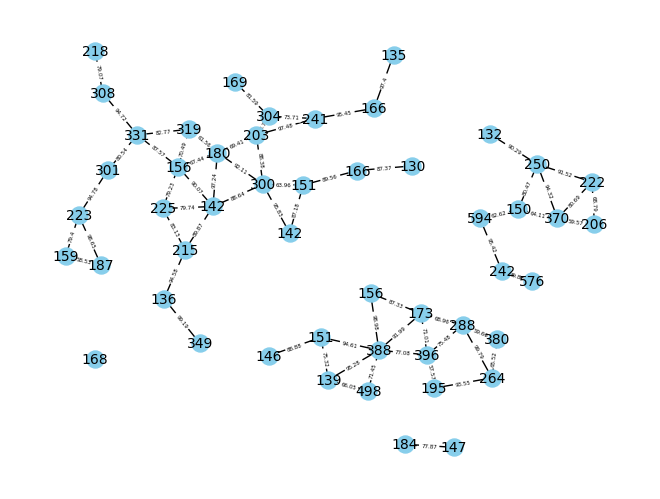

In [94]:
# 绘制图
pos_fr = {node: (data['pos'][0], data['pos'][1]) for node, data in G_fr.nodes(data=True)}
wight_fr = {node: data['wight'] for node, data in G_fr.nodes(data=True)}
nx.draw(G_fr, pos_fr, with_labels=True, node_size=150, node_color='skyblue', font_size=10, labels = wight_fr)

# 添加标签
labels_fr = nx.get_edge_attributes(G_fr, 'weight')
nx.draw_networkx_edge_labels(G_fr, pos_fr, edge_labels=labels_fr,font_size=4)

plt.show()

In [95]:
# 度中心性
degree_centrality_fr = nx.degree_centrality(G_fr)
print("Degree Centrality:", degree_centrality_fr)

# 社区检测

communities_fr = community.greedy_modularity_communities(G_fr)
print("Communities:", communities_fr)

# 路径分析
shortest_paths_fr = dict(nx.all_pairs_shortest_path(G_fr))
print("Shortest Paths:", shortest_paths_fr)

Degree Centrality: {0: 0.04081632653061224, 1: 0.02040816326530612, 2: 0.04081632653061224, 3: 0.08163265306122448, 4: 0.12244897959183673, 5: 0.04081632653061224, 6: 0.08163265306122448, 7: 0.02040816326530612, 8: 0.08163265306122448, 9: 0.061224489795918366, 10: 0.04081632653061224, 11: 0.061224489795918366, 12: 0.04081632653061224, 13: 0.1020408163265306, 14: 0.08163265306122448, 15: 0.061224489795918366, 16: 0.08163265306122448, 17: 0.04081632653061224, 18: 0.061224489795918366, 19: 0.061224489795918366, 20: 0.061224489795918366, 21: 0.061224489795918366, 22: 0.02040816326530612, 23: 0.061224489795918366, 24: 0.04081632653061224, 25: 0.08163265306122448, 26: 0.04081632653061224, 27: 0.04081632653061224, 28: 0.02040816326530612, 29: 0.1020408163265306, 30: 0.08163265306122448, 31: 0.02040816326530612, 32: 0.0, 33: 0.04081632653061224, 34: 0.04081632653061224, 35: 0.04081632653061224, 36: 0.1020408163265306, 37: 0.04081632653061224, 38: 0.061224489795918366, 39: 0.061224489795918366,

{0: 0.04081632653061224,
 1: 0.02040816326530612,
 2: 0.04081632653061224,
 3: 0.08163265306122448,
 4: 0.12244897959183673,
 5: 0.04081632653061224,
 6: 0.08163265306122448,
 7: 0.02040816326530612,
 8: 0.08163265306122448,
 9: 0.061224489795918366,
 10: 0.04081632653061224,
 11: 0.061224489795918366,
 12: 0.04081632653061224,
 13: 0.1020408163265306,
 14: 0.08163265306122448,
 15: 0.061224489795918366,
 16: 0.08163265306122448,
 17: 0.04081632653061224,
 18: 0.061224489795918366,
 19: 0.061224489795918366,
 20: 0.061224489795918366,
 21: 0.061224489795918366,
 22: 0.02040816326530612,
 23: 0.061224489795918366,
 24: 0.04081632653061224,
 25: 0.08163265306122448,
 26: 0.04081632653061224,
 27: 0.04081632653061224,
 28: 0.02040816326530612,
 29: 0.1020408163265306,
 30: 0.08163265306122448,
 31: 0.02040816326530612,
 32: 0.0,
 33: 0.04081632653061224,
 34: 0.04081632653061224,
 35: 0.04081632653061224,
 36: 0.1020408163265306,
 37: 0.04081632653061224,
 38: 0.061224489795918366,
 39: 0